## Observations and Insights 

#### Observation 1

Based on the topline summary (see Summary Statistics below), the drug regimens Capomulin and Ramicane have significantly lower average tumor volumes compared the placebo and other regimens. Not only do these two regimens have the lowest mean and median average tumor volume-- 40.68 and 40.22 mm^3 average respecitively-- they also have the lowest standard deviation. This indicates that the drugs work more consistently across the population, as opposed to working on some mice and not on others. We can infer that these two drugs are the most promising for future trials

#### Observation 2
Also based on the topline summary, it is clear that some drugs are not effective at reducing tumor volume given that the mean and median are close to the plecebo volume of 54.03 mm^3. Naftisol, Stelasyn, and Ketapril seem to have no effect (average tumor volume is actually higher for the Ketapril regimen at 55.24 mm^3). From this, we can infer that these regimens require alteration and/or more study before continuing future trials. 

#### Observation 3
For the mice on the Capomulin regimen, average tumor volume is highly correlated to the individual mouse's weight. Given a correlation coefficient of greater than 0.8, that indicates a strong relationship between these two factors. In the future, I would like to examine this relationship across all regimens to see if the trend holds. If it does, that could be an area of future study to determine if weight might play a role in the progression of tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#Join tables on mouse ID
full_mice_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

In [3]:
#Find each time instance
times = study_results['Timepoint'].unique()

#Will fill in this list with any duplicate mice to exclude
duplicates = []

#Initiate loop
for time in times:
    
    #Filter to each time period
    temp_time_df = study_results.loc[study_results['Timepoint'] == time, :]

    #Count the instances of each mouce during that time period
    #If a mouse is counted more than once, it's a duplicate
    temp_mice_count = pd.DataFrame([temp_time_df['Mouse ID'].value_counts()])

    temp_mice_count = temp_mice_count.transpose()

    #Filter to the duplicate mice (where count > 1)
    extra_mice = temp_mice_count.loc[temp_mice_count['Mouse ID'] > 1, :]

    #Add duplicate mouse ID to dupicate list
    if extra_mice.empty == False:
        for row in extra_mice:
            duplicates.append(extra_mice.index[0])
            

In [4]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.

#Loop through each value in the duplicates list
for mouse in duplicates:
    
    #Select only those rows which do not contain the current iterated value in duplicates
    clean_mouse_data = full_mice_data.loc[full_mice_data["Mouse ID"] != mouse, :]
    
    #Also doing the same for the metadata table in case I need to use it separately later
    clean_metadata = mouse_metadata.loc[mouse_metadata["Mouse ID"] != mouse, :]


## Summary Statistics

In [5]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Get drug names for loop
drugs = clean_mouse_data["Drug Regimen"].unique()

#Headers on the summary table
summary_df = pd.DataFrame({"Drug": [], 
                          "Mean": [], "Median": [], "Variance": [], "Standard Deviation": [], "Standard Error": []})

#Begin loop for each drug
for drug in drugs:
    
    #Filter to a signle drug
    temp_drug_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == drug, :]

    #Caluclate summary stats
    drug_mean = temp_drug_df["Tumor Volume (mm3)"].mean()
    drug_median = temp_drug_df["Tumor Volume (mm3)"].median()
    drug_variance = np.var(temp_drug_df["Tumor Volume (mm3)"])
    drug_stdev = np.std(temp_drug_df["Tumor Volume (mm3)"])
    drug_sem = sem(temp_drug_df["Tumor Volume (mm3)"])
    
    #Add each summary data point to the summary data frame
    summary_df = summary_df.append({"Drug": drug, "Mean": drug_mean, "Median": drug_median,
                                   "Variance": drug_variance, "Standard Deviation": drug_stdev,
                                   "Standard Error": drug_sem}, ignore_index=True)

#Set drug as index for clarity
summary_df.set_index('Drug', inplace = True)

summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331


## Bar and Pie Charts

(0, 255)

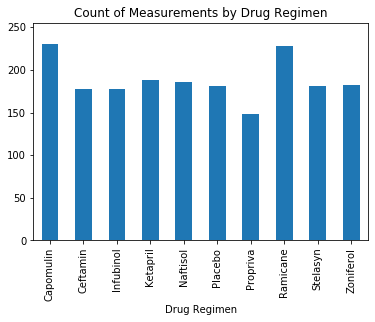

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Group by drug to get counts
drugs_grouped = clean_mouse_data.groupby("Drug Regimen").count()

#Filter only to timepoint to count how many times each drug was administered
measurements_count = drugs_grouped["Timepoint"]

#Plot
measurements_count.plot(kind='bar')

#Adding Title, Limits, etc
plt.title("Count of Measurements by Drug Regimen")
plt.ylim(0, 255)


(0, 255)

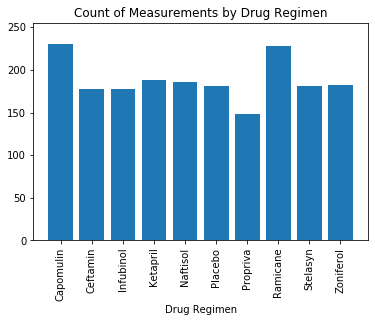

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Set x-axis as numerical value (because I want to  adjust the tilt of the drug titles)
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

#Plot using plt.bar
plt.bar(tick_locations, measurements_count)

#Drugs list needs sorted alphabetically as that's how measurements_count is sorted
arr_drugs = np.sort(drugs)

#Set xticks to the drug regimen, rotated vertically
plt.xticks(tick_locations, arr_drugs, rotation="vertical")

#Adding Title, Limits, etc
plt.title("Count of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylim(0, 255)

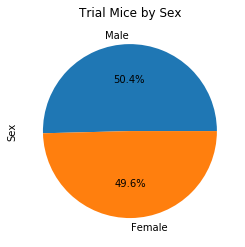

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Get sex data by value_counts on the sex column
sex_breakdown = clean_metadata['Sex'].value_counts()

#Plot (including title)
sex_breakdown.plot(kind='pie', autopct="%1.1f%%", title = 'Trial Mice by Sex')


Text(0.5, 1.0, 'Trial Mice by Sex')

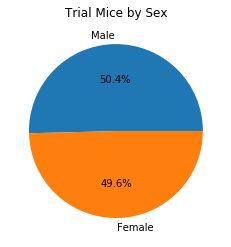

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot using the same sex_breakdown above
plt.pie(sex_breakdown, autopct="%1.1f%%", labels = ['Male', 'Female'])

#Set title
plt.title('Trial Mice by Sex')


## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Create one blank list for each drug
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

#Narow table to only the drugs specified
narrowed_mouse_data = clean_mouse_data.loc[(clean_mouse_data['Drug Regimen'] == 'Capomulin') |  
                                            (clean_mouse_data['Drug Regimen'] == 'Ramicane') |
                                            (clean_mouse_data['Drug Regimen'] == 'Infubinol') |
                                            (clean_mouse_data['Drug Regimen'] == 'Ceftamin'),:]

#Get all the mice into a list
narrowed_mice = narrowed_mouse_data['Mouse ID'].unique()

for mouse in narrowed_mice:
    
    #narrow to a specific mouse (will go in loop later)
    temp_mouse_data = narrowed_mouse_data.loc[narrowed_mouse_data['Mouse ID'] == mouse, :] 

    #Get the max time
    max_time = temp_mouse_data['Timepoint'].max()

    #Filter to last time
    max_mouse_data = temp_mouse_data.loc[temp_mouse_data['Timepoint'] == max_time, :]

    #Get tumor volume
    final_tumor_volume = max_mouse_data.iloc[0,2]

    #Conditional to put the volume in the correct drug list
    if max_mouse_data.iloc[0,4] == 'Capomulin':
       capomulin_data.append(final_tumor_volume)
    elif max_mouse_data.iloc[0,4] == 'Ramicane':
       ramicane_data.append(final_tumor_volume)
    elif max_mouse_data.iloc[0,4] == 'Infubinol':
       infubinol_data.append(final_tumor_volume)
    elif max_mouse_data.iloc[0,4] == 'Ceftamin':
       ceftamin_data.append(final_tumor_volume)


In [11]:
#Calculate Quartiles and IQR for each drug and determine if there are any outliers

#Place all the drug data into a data frame so the quantile() function can be used
tumor_data = pd.DataFrame({"Capomulin": capomulin_data, "Ramicane": ramicane_data,
                           "Infubinol": infubinol_data, "Ceftamin": ceftamin_data})

#List for the loop
tumor_data_drugs = ['Capomulin', "Ramicane", "Infubinol", "Ceftamin"]

for drug in tumor_data_drugs:
    
    #Empty out the outliers array
    outliers = []
    
    #Calculate quartiles, upper/lower bounds, and iqr
    quartiles = tumor_data[drug].quantile([0.25, 0.5, 0.75])

    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]

    iqr = upper_q - lower_q

    #Search for outliers in each column of the turmor_data table
    for measure in tumor_data[drug]:
        if (measure > (upper_q + (1.5*iqr))) | (measure < (lower_q - (1.5*iqr))):
            outliers.append(measure)
    
    #Print a statement for each drug about its potential outliers
    print(f"For {drug}:")
    print(f"Lower quartile: {lower_q} mm^3")
    print(f"Upper quartile: {upper_q} mm^3")
    if not outliers:
        print("There are no outliers in this data based on the 1.5*IQR method")
    else:
        print(f"Potential outliers are: {outliers}")
    print("----------------------")


For Capomulin:
Lower quartile: 32.37735684 mm^3
Upper quartile: 40.1592203 mm^3
There are no outliers in this data based on the 1.5*IQR method
----------------------
For Ramicane:
Lower quartile: 31.56046955 mm^3
Upper quartile: 40.65900627 mm^3
There are no outliers in this data based on the 1.5*IQR method
----------------------
For Infubinol:
Lower quartile: 54.04860769 mm^3
Upper quartile: 65.52574285 mm^3
Potential outliers are: [36.321345799999996]
----------------------
For Ceftamin:
Lower quartile: 48.72207785 mm^3
Upper quartile: 64.29983003 mm^3
There are no outliers in this data based on the 1.5*IQR method
----------------------


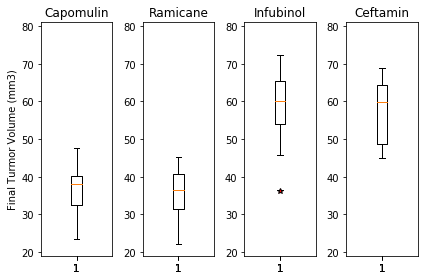

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Set up the subplots and outlier style
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1 ,4, sharex=True)
outlier_style = dict(markerfacecolor='r', marker='*')

#Pass each drugs data to a different subplot
#Include a ylim so that each drug is on the same scale

ax1.set_title('Capomulin')
ax1.set_ylabel('Final Turmor Volume (mm3)')
ax1.boxplot(capomulin_data, flierprops=outlier_style)
ax1.set_ylim(19, 81)

ax2.set_title('Ramicane')
ax2.boxplot(ramicane_data, flierprops=outlier_style)
ax2.set_ylim(19, 81)

ax3.set_title('Infubinol')
ax3.boxplot(infubinol_data, flierprops=outlier_style)
ax3.set_ylim(19, 81)

ax4.set_title('Ceftamin')
ax4.boxplot(ceftamin_data, flierprops=outlier_style)
ax4.set_ylim(19, 81)

plt.tight_layout()

## Line and Scatter Plots

([<matplotlib.axis.YTick at 0x7fb1f8791b38>,
 <a list of 12 Text yticklabel objects>)

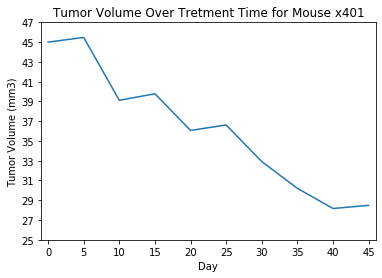

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Specify mouse and then filter down to that ID
mouse = 'x401'

one_mouse = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == mouse, :]

#Get time and tumor volume from the narrowed data
timepoint = one_mouse['Timepoint']
tumor = one_mouse['Tumor Volume (mm3)']

#Plot
plt.plot(timepoint, tumor)

#Specify titles, axes, etc
plt.title("Tumor Volume Over Tretment Time for Mouse x401")
plt.xlabel("Day")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(-1, 46)
plt.ylim(25, 47)

#Adjust ticks to a more readable step size
plt.xticks(np.arange(0, 46, step=5))
plt.yticks(np.arange(25, 48, step=2))


([<matplotlib.axis.YTick at 0x7fb1f849f4a8>,
 <a list of 8 Text yticklabel objects>)

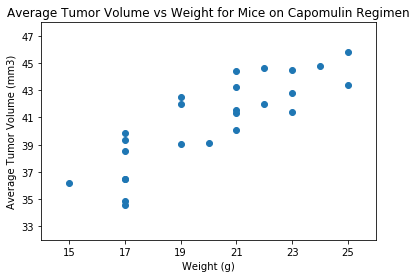

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Filter to capomulin only
capomulin_only = clean_mouse_data.loc[(clean_mouse_data['Drug Regimen'] == 'Capomulin'), :]

#Group by mouse to get average tumor volume
#(Weight stays the same int he grouped because it's a contant value in the clean data table)
grouped_capomulin = capomulin_only.groupby('Mouse ID').mean()

#Plot from grouped
plt.scatter(grouped_capomulin['Weight (g)'], grouped_capomulin["Tumor Volume (mm3)"])

#Specify titles, axes, etc
plt.title("Average Tumor Volume vs Weight for Mice on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.xlim(14, 26)
plt.ylim(32, 48)

#Adjust ticks to a more readable step size
plt.xticks(np.arange(15, 26, step=2))
plt.yticks(np.arange(33, 48, step=2))
                                       

## Correlation and Regression

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = grouped_capomulin['Weight (g)']
y_values = grouped_capomulin["Tumor Volume (mm3)"]

#Get the correlation between x and y
correlation = st.pearsonr(x_values, y_values)

#Get equation of the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(f"The correlation coefficient between weight and average tumor volume is {round(correlation[0],2)}")
print(f"The equation for the linear regression model is {line_eq}")

The correlation coefficient between weight and average tumor volume is 0.84
The equation for the linear regression model is y = 0.95x + 21.55
